In [1]:
from text_to_places import *
from map_places import *
from extract_info import *

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject
  return f(*args, **kwds)


In [2]:
import wikipedia
doc = wikipedia.page("Bill Clinton")
text = doc.content

In [3]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

In [4]:
# from spacy.pipeline import DependencyParser
# parser = DependencyParser(nlp.vocab)

In [5]:
gdf = makeDataFrame(text)
# ex = gdf.iloc[28].sentence
# root = [token for token in ex if token.head == token][0]
# subheads = [token for token in ex if token.head == root and token != root]
# subclauses = [list(h.subtree) for h in subheads]
# print(ex)
# print(root)
# print(subheads)
# print(subclauses)


locations [['the United States', 'GPE', 5, William Jefferson Clinton (born William Jefferson Blythe III; August 19, 1946) is an American politician who served as the 42nd president of the United States from 1993 to 2001.], ['Arkansas', 'GPE', 7, Prior to the presidency, he was the governor of Arkansas from 1979 to 1981, and again from 1983 to 1992, and the attorney general of Arkansas from 1977 to 1979.], ['Arkansas', 'GPE', 10, Prior to the presidency, he was the governor of Arkansas from 1979 to 1981, and again from 1983 to 1992, and the attorney general of Arkansas from 1977 to 1979.], ['Arkansas', 'GPE', 17, Clinton was born and raised in Arkansas and attended Georgetown University, University College, Oxford, and Yale Law School.], ['Arkansas', 'GPE', 24, After graduating, Clinton returned to Arkansas and won election as the Attorney General of Arkansas, serving from 1977 to 1979.], ['Arkansas', 'GPE', 25, After graduating, Clinton returned to Arkansas and won election as the Atto

In [7]:
import pandas as pd

# make keywords reference lemmas, not strings
topics = {
                'birth': ['was born', ' born'],
                'death': [' died'],
                'travel': ['went to ', ' moved to', 'traveled', 'travelled', 'visited'],
                'lived':  [' lived in', ' lived at', ' live in', ' reside', 'resided', 'residence at', 'stayed in ', 'stay in ', ' spent '],
                'education': ['university', 'school ', 'studied', 'to study ' 'schooling', 'education ', 'educated', ' degree in ' 'College', 'graduate', 'graduating', 'worked as a', 'worked at', 'job as', 'jobs'],
                'parents': ['father', ' mother', 'grandfather', 'grandmother', 'grandparents']
                }


def getTopics2(gdf):
    gdf['topic'] = pd.Series([None for n in range(len(gdf))])
    for i,sentence in enumerate(gdf['sentence']):
        for topic,phrases in topics.items():
            for phrase in phrases:
                if phrase in sentence.text:
                    gdf['topic'][i] = topic
    return gdf


In [8]:
%%time
getTopics2(gdf)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Wall time: 2.44 s


,text,label,idx,sentence,coordinates,topic
0,the United States,GPE,5,"(William, Jefferson, Clinton, (, born, William...",POINT (-100.4458825 39.7837304),None
1,Arkansas,GPE,7,"(Prior, to, the, presidency, ,, he, was, the, ...",POINT (-92.4479108 35.2048883),None
2,Arkansas,GPE,10,"(Prior, to, the, presidency, ,, he, was, the, ...",POINT (-92.4479108 35.2048883),None
3,Arkansas,GPE,17,"(Clinton, was, born, and, raised, in, Arkansas...",POINT (-92.4479108 35.2048883),birth
4,Arkansas,GPE,24,"(After, graduating, ,, Clinton, returned, to, ...",POINT (-92.4479108 35.2048883),education
5,Arkansas,GPE,25,"(After, graduating, ,, Clinton, returned, to, ...",POINT (-92.4479108 35.2048883),education
6,Arkansas,GPE,27,"(As, Governor, of, Arkansas, ,, he, overhauled...",POINT (-92.4479108 35.2048883),education
7,U.S.,GPE,64,"(He, is, only, the, second, U.S., president, t...",POINT (-88.73215845 45.1895845),None
8,U.S.,GPE,73,"(In, foreign, policy, ,, Clinton, ordered, U.S...",POINT (-88.73215845 45.1895845),None
9,Kosovo,GPE,75,"(In, foreign, policy, ,, Clinton, ordered, U.S...",POINT (20.9021231 42.5869578),None


In [9]:
getDates(gdf)

C:\Users\rowan\Dropbox\programmery\recurse\auto-map-generation\extract_info.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  gdf['date'][i] = [x.text for x in sentence.ents if x.label_ == 'DATE'][:1]


,text,label,idx,sentence,coordinates,topic,date
0,the United States,GPE,5,"(William, Jefferson, Clinton, (, born, William...",POINT (-100.4458825 39.7837304),None,"[August 19, 1946]"
1,Arkansas,GPE,7,"(Prior, to, the, presidency, ,, he, was, the, ...",POINT (-92.4479108 35.2048883),None,[1979 to 1981]
2,Arkansas,GPE,10,"(Prior, to, the, presidency, ,, he, was, the, ...",POINT (-92.4479108 35.2048883),None,[1979 to 1981]
3,Arkansas,GPE,17,"(Clinton, was, born, and, raised, in, Arkansas...",POINT (-92.4479108 35.2048883),birth,[]
4,Arkansas,GPE,24,"(After, graduating, ,, Clinton, returned, to, ...",POINT (-92.4479108 35.2048883),education,[1977 to 1979]
5,Arkansas,GPE,25,"(After, graduating, ,, Clinton, returned, to, ...",POINT (-92.4479108 35.2048883),education,[1977 to 1979]
6,Arkansas,GPE,27,"(As, Governor, of, Arkansas, ,, he, overhauled...",POINT (-92.4479108 35.2048883),education,[]
7,U.S.,GPE,64,"(He, is, only, the, second, U.S., president, t...",POINT (-88.73215845 45.1895845),None,[]
8,U.S.,GPE,73,"(In, foreign, policy, ,, Clinton, ordered, U.S...",POINT (-88.73215845 45.1895845),None,[2000]
9,Kosovo,GPE,75,"(In, foreign, policy, ,, Clinton, ordered, U.S...",POINT (20.9021231 42.5869578),None,[2000]


In [10]:
gdf_sorted = gdf.sort_values(['topic', 'idx'])
for x in range(len(gdf_sorted)):
    print("TOPIC:", gdf_sorted.iloc[x]['topic'], '\n', gdf_sorted.iloc[x]['sentence'], '\n')

TOPIC: birth 
 Clinton was born and raised in Arkansas and attended Georgetown University, University College, Oxford, and Yale Law School. 

TOPIC: birth 
 Early life and career ==

Clinton was born William Jefferson Blythe III on August 19, 1946, at Julia Chester Hospital in Hope, Arkansas. 

TOPIC: birth 
 Early life and career ==

Clinton was born William Jefferson Blythe III on August 19, 1946, at Julia Chester Hospital in Hope, Arkansas. 

TOPIC: birth 
 In 1998, Nobel laureate Toni Morrison called Clinton "the first Black president", saying, "Clinton displays almost every trope of blackness: single-parent household, born poor, working-class, saxophone-playing, McDonald's-and-junk-food-loving boy from Arkansas". 

TOPIC: education 
 After graduating, Clinton returned to Arkansas and won election as the Attorney General of Arkansas, serving from 1977 to 1979. 

TOPIC: education 
 After graduating, Clinton returned to Arkansas and won election as the Attorney General of Arkansas, s

 in Philosophy, Politics, and Economics but transferred to a B.Litt. 

TOPIC: None 
 in politics and, ultimately, a B.Phil. in politics. 

TOPIC: None 
 He had received an offer to study at Yale Law School, Yale University, but he left early to return to the United States and did not receive a degree from Oxford. 

TOPIC: None 
 During the Vietnam War, Clinton received educational draft deferments while he was in England in 1968 and 1969. 

TOPIC: None 
 While at Oxford, he participated in Vietnam War protests and organized a Moratorium to End the War in Vietnam event in October 1969. 

TOPIC: None 
 He subsequently decided not to join the ROTC, saying in a letter to the officer in charge of the program that he opposed the war, but did not think it was honorable to use ROTC, National Guard, or Reserve service to avoid serving in Vietnam. 

TOPIC: None 
 He issued a notarized statement during the 1992 presidential campaign:
During the 1992 campaign, it was revealed that Clinton's uncle 

 Further concern arose when Bill Clinton announced that, with Hillary, voters would be getting two presidents "for the price of one".Clinton was still the Governor of Arkansas while campaigning for U.S. president, and he returned to his home state to see that Ricky Ray Rector would be executed. 

TOPIC: None 
 Further concern arose when Bill Clinton announced that, with Hillary, voters would be getting two presidents "for the price of one".Clinton was still the Governor of Arkansas while campaigning for U.S. president, and he returned to his home state to see that Ricky Ray Rector would be executed. 

TOPIC: None 
 According to both Arkansas state law and Federal law, a seriously mentally impaired inmate cannot be executed. 

TOPIC: None 
 Clinton's return to Arkansas for the execution was framed in an article for The New York Times as a possible political move to counter "soft on crime" accusations. 

TOPIC: None 
 Clinton then pointed to his moderate, "New Democrat" record as governo

 The Battle of Mogadishu occurred in Somalia in 1993. 

TOPIC: None 
 During the operation, two U.S. helicopters were shot down by rocket-propelled grenade attacks to their tail rotors, trapping soldiers behind enemy lines. 

TOPIC: None 
 In response, U.S. forces were withdrawn from Somalia and later conflicts were approached with fewer soldiers on the ground. 

TOPIC: None 
 In response, U.S. forces were withdrawn from Somalia and later conflicts were approached with fewer soldiers on the ground. 

TOPIC: None 
 In 1995, U.S. and NATO aircraft attacked Bosnian Serb targets to halt attacks on U.N. safe zones and to pressure them into a peace accord. 

TOPIC: None 
 Clinton deployed U.S. peacekeepers to Bosnia in late 1995, to uphold the subsequent Dayton Agreement.
 

TOPIC: None 
 Clinton deployed U.S. peacekeepers to Bosnia in late 1995, to uphold the subsequent Dayton Agreement.
 

TOPIC: None 
 In 1992, before his presidency, Clinton proposed sending a peace envoy to Northern Irel

TOPIC: None 
 Slobodan Milošević, the president of Yugoslavia at the time of the atrocities, was eventually brought to trial before the International Criminal Tribunal for the former Yugoslavia in the Hague on charges of crimes against humanity, genocide, and war crimes. 

TOPIC: None 
 Slobodan Milošević, the president of Yugoslavia at the time of the atrocities, was eventually brought to trial before the International Criminal Tribunal for the former Yugoslavia in the Hague on charges of crimes against humanity, genocide, and war crimes. 

TOPIC: None 
 The United Nations weapons inspectors have done a truly remarkable job, finding and destroying more of Iraq's arsenal than was destroyed during the entire gulf war. 

TOPIC: None 
 Seeking to weaken Hussein's grip on power, Clinton signed the Iraq Liberation Act of 1998 into law on October 31, 1998, which instituted a policy of "regime change" against Iraq, though it explicitly stated it did not provide for direct intervention on the 

 Euna Lee and Laura Ling had been imprisoned for illegally entering the country from China. 

TOPIC: None 
 He was named United Nations Special Envoy to Haiti in 2009. 

TOPIC: None 
 In response to the 2010 Haiti earthquake, U.S. President Barack Obama announced that Clinton and George W. Bush would coordinate efforts to raise funds for Haiti's recovery. 

TOPIC: None 
 In response to the 2010 Haiti earthquake, U.S. President Barack Obama announced that Clinton and George W. Bush would coordinate efforts to raise funds for Haiti's recovery. 

TOPIC: None 
 In response to the 2010 Haiti earthquake, U.S. President Barack Obama announced that Clinton and George W. Bush would coordinate efforts to raise funds for Haiti's recovery. 

TOPIC: None 
 Clinton continues to visit Haiti to witness the inauguration of refugee villages, and to raise funds for victims of the earthquake. 

TOPIC: None 
 In 2010, Clinton announced support of, and delivered the keynote address for, the inauguration of 

In [11]:
gdf_sorted

,text,label,idx,sentence,coordinates,topic,date
3,Arkansas,GPE,17,"(Clinton, was, born, and, raised, in, Arkansas...",POINT (-92.4479108 35.2048883),birth,[]
17,Hope,GPE,111,"(Early, life, and, career, =, =, \n\n, Clinton...",POINT (42.1230338 45.0554436),birth,"[August 19, 1946]"
18,Arkansas,GPE,112,"(Early, life, and, career, =, =, \n\n, Clinton...",POINT (-92.4479108 35.2048883),birth,"[August 19, 1946]"
179,Arkansas,GPE,1424,"(In, 1998, ,, Nobel, laureate, Toni, Morrison,...",POINT (-92.4479108 35.2048883),birth,[1998]
4,Arkansas,GPE,24,"(After, graduating, ,, Clinton, returned, to, ...",POINT (-92.4479108 35.2048883),education,[1977 to 1979]
5,Arkansas,GPE,25,"(After, graduating, ,, Clinton, returned, to, ...",POINT (-92.4479108 35.2048883),education,[1977 to 1979]
6,Arkansas,GPE,27,"(As, Governor, of, Arkansas, ,, he, overhauled...",POINT (-92.4479108 35.2048883),education,[]
26,Washington,GPE,171,"(=, College, and, law, school, years, =, =, \n...",POINT (-77.0365625 38.8950092),education,[1968]
27,D.C.,GPE,172,"(=, College, and, law, school, years, =, =, \n...",POINT (-76.987883253882 38.89366125),education,[1968]
29,Georgetown,GPE,189,"(=, =, Oxford, =, =, =, \n, Upon, graduating, ...",POINT (-84.55883110000001 38.2097967),education,[1968]


In [12]:
gdf_by_topic = gdf.set_index("topic", drop = False)

In [17]:
gdf_by_topic

,text,label,idx,sentence,coordinates,topic,date
topic,,,,,,,
NaN,the United States,GPE,5,"(William, Jefferson, Clinton, (, born, William...",POINT (-100.4458825 39.7837304),None,"[August 19, 1946]"
NaN,Arkansas,GPE,7,"(Prior, to, the, presidency, ,, he, was, the, ...",POINT (-92.4479108 35.2048883),None,[1979 to 1981]
NaN,Arkansas,GPE,10,"(Prior, to, the, presidency, ,, he, was, the, ...",POINT (-92.4479108 35.2048883),None,[1979 to 1981]
birth,Arkansas,GPE,17,"(Clinton, was, born, and, raised, in, Arkansas...",POINT (-92.4479108 35.2048883),birth,[]
education,Arkansas,GPE,24,"(After, graduating, ,, Clinton, returned, to, ...",POINT (-92.4479108 35.2048883),education,[1977 to 1979]
education,Arkansas,GPE,25,"(After, graduating, ,, Clinton, returned, to, ...",POINT (-92.4479108 35.2048883),education,[1977 to 1979]
education,Arkansas,GPE,27,"(As, Governor, of, Arkansas, ,, he, overhauled...",POINT (-92.4479108 35.2048883),education,[]
NaN,U.S.,GPE,64,"(He, is, only, the, second, U.S., president, t...",POINT (-88.73215845 45.1895845),None,[]
NaN,U.S.,GPE,73,"(In, foreign, policy, ,, Clinton, ordered, U.S...",POINT (-88.73215845 45.1895845),None,[2000]


In [13]:
# gdf['category'] = gdf.idx.map(lambda i: int(i/200))

In [14]:
# gdf.iloc[4].sentence

In [15]:
# ax = world.plot(
#     color='white', edgecolor='black', figsize=(20,20)
# )
# colors = ['red', 'orange', 'green', 'blue', 'indigo', 'purple', 'brown']
# for i,cat in enumerate(gdf.category.unique()):
#     gdf[gdf.category == cat].plot(ax=ax, color=colors[i%len(colors)], label=cat, alpha=0.25)
# plt.legend()
# plt.show()

TypeError: unhashable type: 'slice'

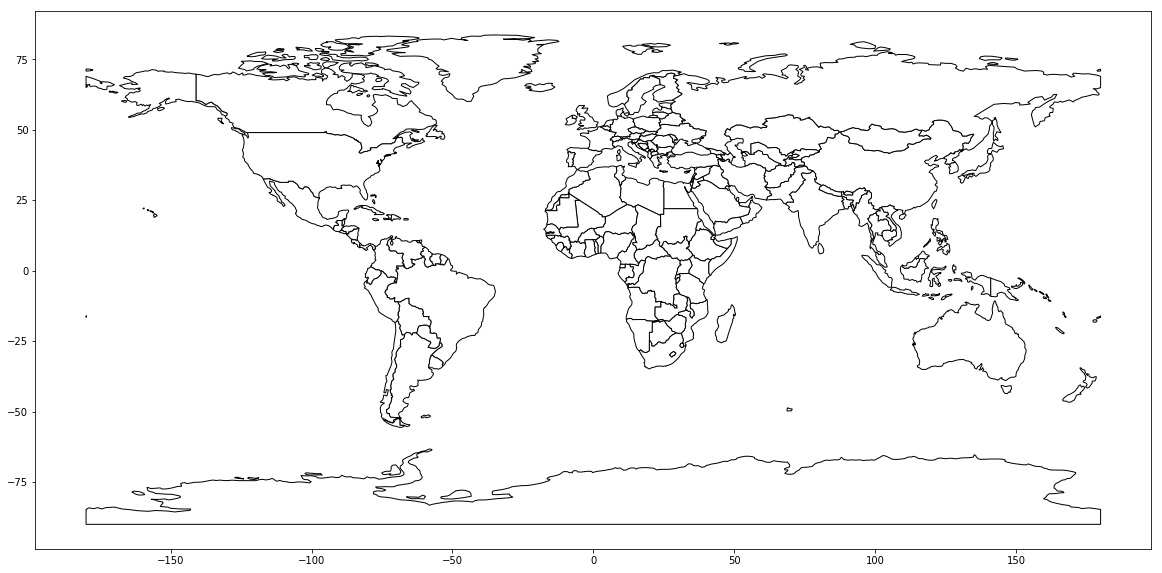

In [16]:
ax = world.plot(
    color='white', edgecolor='black', figsize=(20,20)
)

birth = gdf_by_topic['birth',:]
birth.plot(ax=ax, color='red', alpha=0.25)

plt.show()